In [25]:
import numpy as np
import matplotlib.pyplot as plt
import GCRCatalogs
from scipy.stats import gaussian_kde
import h5py
import glob
import re

Pixel 10071:

In [9]:
filenames_truth=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/z_*.step_all.healpix_*_magwerrSNtrim.hdf5')])
filenames_photoz=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/pipelinedir/outputs/photoz_pdf_z_*.step_all.healpix_*.hdf5')])
filenames_truth_single_pixel=filenames_truth[[1,18,35]]
filenames_photoz_single_pixel=filenames_photoz[[1,18,35]]

In [10]:
truth={}
mag_i_lsst_truth={}
for i in filenames_truth_single_pixel:
    f = h5py.File(i)
    data=f['photometry']
    z=np.array(data['redshift'])
    ids=np.array(data['id'])
    mag_i_lsst=np.array(data['mag_i_lsst'])
    truth_subset=dict(zip(ids,z))
    mag_i_lsst_subset=dict(zip(ids,mag_i_lsst))
    truth.update(truth_subset)
    mag_i_lsst_truth.update(mag_i_lsst_subset)
pdf={}
point_estimates_mode={}
odds={}
for i in filenames_photoz_single_pixel:
    f = h5py.File(i,'r')
    pdf_single=np.array(f['pdf']['pdf'])
    point_estimates_mode_single=np.array(f['point_estimates']['z_mode'])
    odds_single=np.array(f['point_estimates']['ODDS'])
    ids=np.array(f['id']['galaxy_id'])
    pdf_subset=dict(zip(ids,pdf_single))
    point_estimates_mode_subset=dict(zip(ids,point_estimates_mode_single))
    odds_subset=dict(zip(ids,odds_single))
    odds.update(odds_subset)
    pdf.update(pdf_subset)
    point_estimates_mode.update(point_estimates_mode_subset)

In [20]:
odds_array=np.array(list(odds.values()))
pdf_array = np.array(list(pdf.values())).astype(np.float)
keys_array = np.array(list(pdf.keys()))
pdf_stacked=np.sum(pdf_array.astype(np.float),axis=0)
grid=np.linspace(0,3.5,351) #READ THIS IN
truth_array=np.array(list(truth.values()))
bpz_array=np.array(list(point_estimates_mode.values()))

In [29]:
def kde(x, x_grid, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method='scott', **kwargs)
    return kde.evaluate(x_grid)
truth_kde=kde(truth_array,grid)

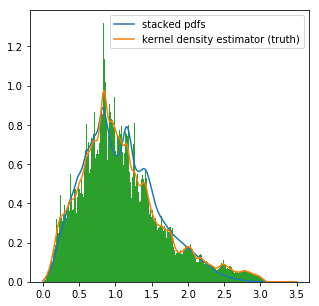

In [51]:
plt.figure(figsize=(5,5))
plt.plot(grid,pdf_stacked/len(truth_array)/0.01,label='stacked pdfs')
plt.plot(grid,truth_kde,label='kernel density estimator'
plt.hist(truth.values(),bins=301,density=True,label='truth histogram')
plt.legend()
plt.show()

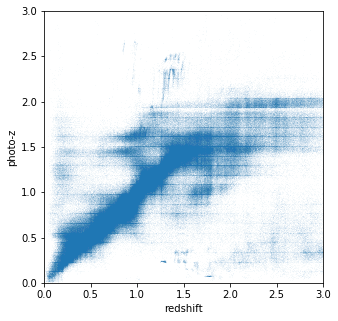

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(truth_array,bpz_array,s=0.0001)
plt.xlabel('redshift')
plt.ylabel('photo-z')
plt.xlim((0,3))
plt.ylim((0,3))
plt.show()